In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

In [2]:
# Functions defined by our costate equations
def dp1(x,y,a1,a2):
  return 4*a1*x**3 - 4*a2*x**3
def dp2(x,y,a1,a2,a3):
  return 4*a1*y**3 - 4*a2*y**3 - a3

In [3]:
# Defines our velocity and boundary cost functions
def Cb(x,y,a1,a2,a3):
  if y < 0 :
    return - a3*y
  elif x**4+y**4 < 2**4:
    return a2*(1-x**4-y**4)
  else:
    return a1*(x**4+y**4-2**4)

def Cv(dx,dy,b1,b2,b3):
  if dx > 0:
    return b1*(dx-0.022) + b2*(dy-0.022)
  else:
    return - b3*dx

time: 0.0767385383481068
       message: The maximum number of mesh nodes is exceeded.
       success: False
        status: 1
             x: [-1.500e+00 -1.500e+00 ...  1.500e+00  1.500e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7de8ebea6940>
             p: [ 7.674e-02]
             y: [[-1.500e+00 -1.500e+00 ...  1.500e+00  1.500e+00]
                 [ 2.483e-07  2.913e-07 ... -1.641e-07  2.214e-18]
                 ...
                 [-1.930e+06 -1.930e+06 ...  1.930e+06  1.930e+06]
                 [ 1.571e+07  1.570e+07 ...  1.571e+07  1.571e+07]]
            yp: [[-4.775e-16  1.428e-04 ...  1.830e-03  1.688e-03]
                 [ 6.310e-15  1.155e-03 ...  5.324e-04  1.688e-03]
                 ...
                 [ 6.640e+06  6.640e+06 ...  6.640e+06  6.640e+06]
                 [-4.558e+07 -4.558e+07 ...  4.557e+07  4.557e+07]]
 rms_residuals: [ 1.999e+00  1.996e+00 ...  1.995e+00  1.995e+00]
         niter: 6


/tmp/ipython-input-2240443577.py:59: RuntimeWarning: invalid value encountered in power
  plt.plot(x_,(1-x_**4)**(1/4),"r", label="track boundary")


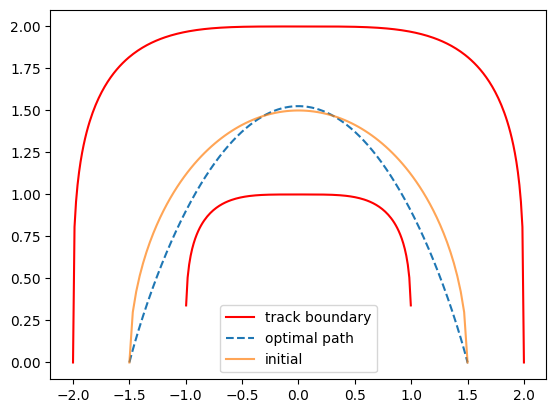

In [4]:
# setting
t_steps = 100
w = 5**5
a1 = 7**3 + 2**4 + 2**3
a2 = 7**3 + 2**4 + 2**3 + 17
a3 = 12**9 + 2**4 + 2**2 + 17
b1 = 6**7 - 50
b2 = 6**7 - 50
b3 = 6**7

eps = 1e-4

init_pos = np.array([-1.5,0])
final_pos = np.array([1.5,0])

# get ode
def ode(t,x,p):
    return p[0]*np.array([x[2],
                      x[3],
                      x[6]/(2*w),
                      x[7]/(2*w),
                      dp1(x[0],x[1],a1,a2),
                      dp2(x[0],x[1],a1,a2,a3),
                      b1 - x[4] - b3,
                      b2 - x[5]])
# get the boundary conditions
def bcs(ya,yb,p):
    return np.array([ya[0] - init_pos[0],
                      ya[1]- init_pos[1],
                      ya[2],
                      ya[3],
                      yb[0] - final_pos[0],
                      yb[1] - final_pos[1],
                      yb[2] - 0.022,
                      yb[3] - 0.022,
                      yb[4]*yb[2]+yb[5]*yb[3]+yb[6]*yb[6]/(2*w)+yb[7]*yb[7]/(2*w) - 1 - Cb(yb[0],yb[1],a1,a2,a3) - Cv(yb[2],yb[3],b1,b2,b3) - w*(yb[6]/(2*w))**2 - w*(yb[7]/(2*w))**2])

# Make initial guess
y0 = np.ones((8, t_steps)) * 0.001
x = np.linspace(init_pos[0], final_pos[0], t_steps)

y1 = np.sqrt(1.5**2 - x[:int(t_steps/2)]**2 )
y2 = y1[::-1]

y_init = np.concatenate((y1, y2))
y0[0,:] = x
y0[1,:] = y_init
p = [0.5]

# solve bvp
res = solve_bvp(ode, bcs, x, y0, p, max_nodes=30000)
# setting
x_ = np.linspace(-2,2,300)

print("time:",res.p[0])
print(res)
# plotting obstical
plt.plot(x_,(2**4-x_**4)**(1/4),"r")
plt.plot(x_,(1-x_**4)**(1/4),"r", label="track boundary")
# plotting
plt.plot(res.y[0],res.y[1], linestyle="--",label="optimal path")
plt.plot(y0[0,:],y0[1,:], label="initial", alpha=0.7)
plt.legend()
plt.show()


/tmp/ipython-input-3355804297.py:3: RuntimeWarning: invalid value encountered in power
  plt.plot(x_,(1-x_**4)**(1/4),"r", label="track boundary")
/tmp/ipython-input-3355804297.py:5: RuntimeWarning: invalid value encountered in power
  plt.plot(x_,-(1-x_**4)**(1/4),"r")


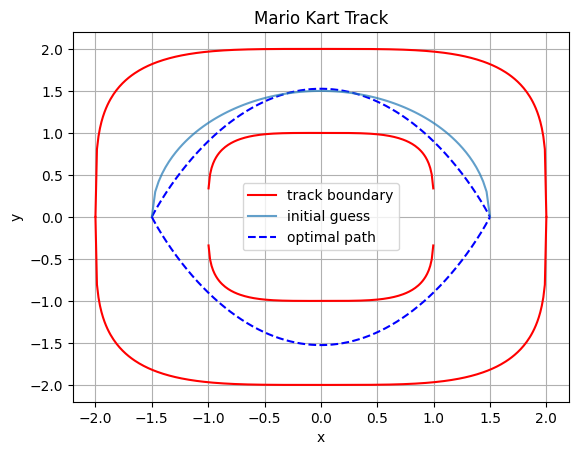

In [5]:
# plotting obstical
plt.plot(x_,(2**4-x_**4)**(1/4),"r")
plt.plot(x_,(1-x_**4)**(1/4),"r", label="track boundary")
plt.plot(x_,-(2**4-x_**4)**(1/4),"r")
plt.plot(x_,-(1-x_**4)**(1/4),"r")
# plotting
plt.plot(res.y[0],res.y[1], linestyle="--", color="b")
plt.plot(y0[0,:],y0[1,:], label="initial guess", alpha=0.7)
plt.plot(res.y[0],-res.y[1], linestyle="--", color="b",label="optimal path")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mario Kart Track")
plt.legend()
plt.grid()
plt.show()

In [6]:
# Calculations mad during the testing
w = 5**5
a1 = 7**3 + 2**4 + 2**3
a2 = 7**3 + 2**4 + 2**3 + 17
a3 = 12**9 + 2**4 + 2**2 + 17
b1 = 6**7 - 50
b2 = 6**7 - 50
b3 = 6**7

print("w:",w)
print("a1:",a1)
print("a2",a2)
print("a3",a3)
print("b1",b1)
print("b2",b2)
print("b3",b3)

w: 3125
a1: 367
a2 384
a3 5159780389
b1 279886
b2 279886
b3 279936
